### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 25th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$

1) What does this integral analytically evaluate to? (Should involve $\sigma$.) Once you work this equation out, we will refer to this equality of the integral and analytic value as EQ1. 

2) Write down the standard form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

3) Manipulate EQ1 such that you can write the integral in terms of a function of $x$ weighted by a normalized half-Gaussian distribution. 

4) Draw $N=10^5$ samples from a $\sigma=2$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your new equation involving a half-Gaussian distribution from (3). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

5) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

6) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

Part 1:

The general form of this integral goes as follows:

$ \int_0^\infty x^{n} \exp(-ax^{2})\,dx = \frac{\Gamma(\frac{n+1}{2})}{2a(\frac{n+1}{2})}$

Substituting $a$ for $\frac{1}{2\sigma^2}$ and $n$ for 3 gives:

$\frac{\Gamma(2)}{2(\frac{1}{2\sigma^2})^2}$

With $\Gamma(2) = 1$ and simplifying, we get:

$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4$



Part 2:

The standard form of a Gaussian distribution with $\mu = 0$ and $\sigma = \sigma$ is:

$f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp(-\frac{x}{2\sigma})^{2}$

The corresponding half-Gaussian distribution is:

$f(x)_{half} = \frac{2}{\sigma\sqrt{2\pi}} \exp(-\frac{x}{2\sigma})^{2}$

Part 3:

Rearranging we get:

$\exp(-\frac{x}{2\sigma})^{2} = f(x)_{half} \frac{\sigma\sqrt{2\pi}}{2}$

And subsituting:

$ \int_0^\infty x^3 \frac{\sigma\sqrt{2\pi}}{2} f(x)_{half}\,dx$



32.155200486228935
32
[np.float64(37.08581709420176), np.float64(20.528760425696838), np.float64(27.34591137025437), np.float64(18.774187301908356), np.float64(31.37014922794297), np.float64(29.835031374414893), np.float64(22.267978440683642), np.float64(20.24882428353634), np.float64(25.86300881037135), np.float64(33.18718687278253), np.float64(26.988141099869715), np.float64(27.689341687996247), np.float64(43.2859411320655), np.float64(39.68933219989523), np.float64(15.165834709392323), np.float64(27.746924132155645), np.float64(60.39413666033682), np.float64(28.178013714404443), np.float64(36.54419107724472), np.float64(21.267941609880953), np.float64(38.459565109816566), np.float64(34.279524783886046), np.float64(35.80224358962493), np.float64(29.16422005477463), np.float64(25.091632729902802), np.float64(32.80188820671337), np.float64(30.121328025211756), np.float64(43.33490773890085), np.float64(35.681519475638105), np.float64(25.111074170835504), np.float64(35.66783651557929), n

<>:53: SyntaxWarning: invalid escape sequence '\l'
<>:53: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3996/544327461.py:53: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log_{10}N$')


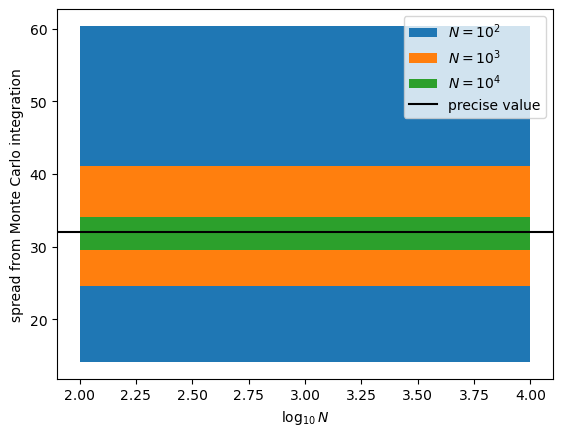

In [100]:
import numpy as np
import scipy.stats
from scipy.stats import norm
from matplotlib import pyplot as plt

#part 4
sigma = 2

distG = scipy.stats.norm(loc=0, scale=sigma) # normal distribution with mean = 0 and stdev = 2
xgrid = np.linspace(-100,100,1000) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid) #pdf of gaussian 

draws = distG.rvs(size=10**5) # random draws
pos_vals = np.where(draws>0) #mask only for positive values
draws = draws[pos_vals]
integral = np.mean(draws**3)*sigma*np.sqrt(2*np.pi)/2 #evaluating using integration method
expected_val = 2*sigma**4 #using precise mathematical value
print(integral)
print(expected_val)
#THESE VALUES MATCH!

#part 5
#N = 10**3, do 100 times
vals_1 = []
for i in range(100):
    draws = distG.rvs(size=10**2) # random draws
    pos_vals = np.where(draws>0)
    draws = draws[pos_vals]
    integral = np.mean(draws**3)*sigma*np.sqrt(2*np.pi)/2
    vals_1.append(integral) #store values

#N = 10**3, do 100 times
vals_2 = []
for i in range(100):
    draws = distG.rvs(size=10**3) # random draws
    pos_vals = np.where(draws>0)
    draws = draws[pos_vals]
    integral = np.mean(draws**3)*sigma*np.sqrt(2*np.pi)/2
    vals_2.append(integral)

#N = 10**4, do 100 times
vals_3 = []
for i in range(100):
    draws = distG.rvs(size=10**4) # random draws
    pos_vals = np.where(draws>0)
    draws = draws[pos_vals]
    integral = np.mean(draws**3)*sigma*np.sqrt(2*np.pi)/2
    vals_3.append(integral)

#part 6
N = [10**2,10**3,10**4]
max_vals = [np.max(vals_1), np.max(vals_2), np.max(vals_3)] #grab max values for each N
min_vals = [np.min(vals_1), np.min(vals_2), np.min(vals_3)] #min values
plt.fill_between(np.log10(N), max_vals[0], min_vals[0], label='$N = 10^{2}$')
plt.fill_between(np.log10(N), max_vals[1], min_vals[1], label='$N = 10^{3}$')
plt.fill_between(np.log10(N), max_vals[2], min_vals[2],label='$N = 10^{4}$')
plt.axhline(expected_val, color='black', label='precise value')
plt.legend()
plt.xlabel('$\log_{10}N$')
plt.ylabel('spread from Monte Carlo integration')
plt.show()


SRT: So close, but a few issues. 

Some coding inefficiencies. Looping operations over `N` instead of having differnet blocks would have been more compact -2 points.

For the final plotting, all you needed to do was do fill_between on the array of min_vals and max_vals to get a region that is getting narrower as `N` increases, honing in more on the analytic result. Instead you made 3 different fill_between calls, which doesn't make sense. -3 points 

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=150$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^5$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 150? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

10 random draws:  [116.36344332  87.28971348  96.03343447 106.09730106  93.4051184
  85.88562615 119.71698793  88.5142426  109.02788587 101.43365931] pdf at x=150:  0.00010281859975274035


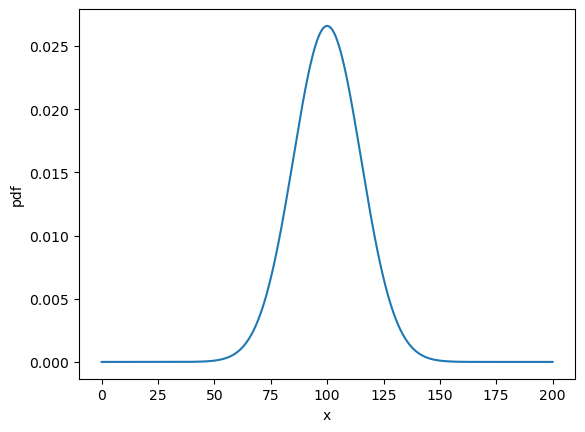

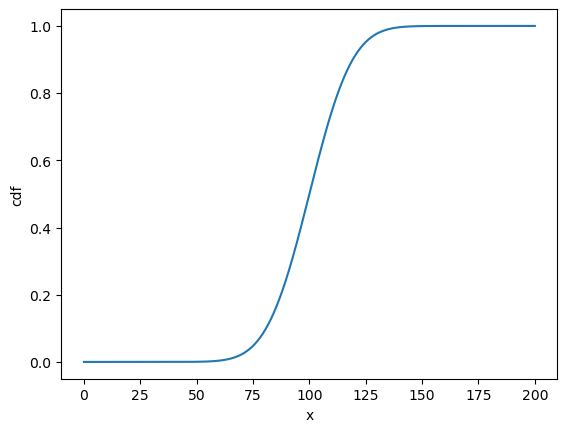

/tmp/ipykernel_3996/968840684.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


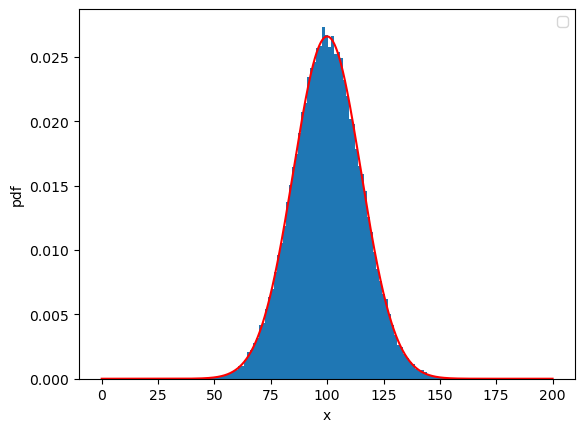

fraction of people with IQ > 150:  0.0004290603331967846
one in a million IQs:  28.69863536765652 171.3013646322563


In [34]:
#Problem 2 part 1
distG = scipy.stats.norm(loc=100, scale=15) # normal distribution with mean = 100 and stdev = 15
xgrid = np.linspace(0,200,1000) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)

draws = distG.rvs(size=10) # 10 random draws
p = distG.pdf(150) # pdf evaluated at x=150

print('10 random draws: ', draws, 'pdf at x=150: ',p)
plt.plot(xgrid, gaussPDF)
plt.xlabel('x')
plt.ylabel('pdf')
plt.show()

#part 2
gaussCDF = distG.cdf(xgrid) #cdf of gaussian
plt.plot(xgrid, gaussCDF)
plt.xlabel('x')
plt.ylabel('cdf')
plt.show()

samples = distG.ppf(np.random.rand(10**5)) #10**5 random samples using ppf
plt.hist(samples, bins=100, density=True)
plt.plot(xgrid, gaussPDF, color='red')
plt.ylabel('pdf')
plt.xlabel('x')
plt.legend()
plt.show()

#part 3
iq = distG.cdf(150) #percentile of people with iq with 150 or less
print('fraction of people with IQ > 150: ', 1-iq) #subtract off one to get >150

#part 4
iq_low = distG.ppf(1/10**6) #iq that gets percentile of lower one in a million

iq_high = distG.ppf(1-(1/10**6)) #need to do for upper one in a million
print('one in a million IQs: ', iq_low, iq_high)

SRT: Very good

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

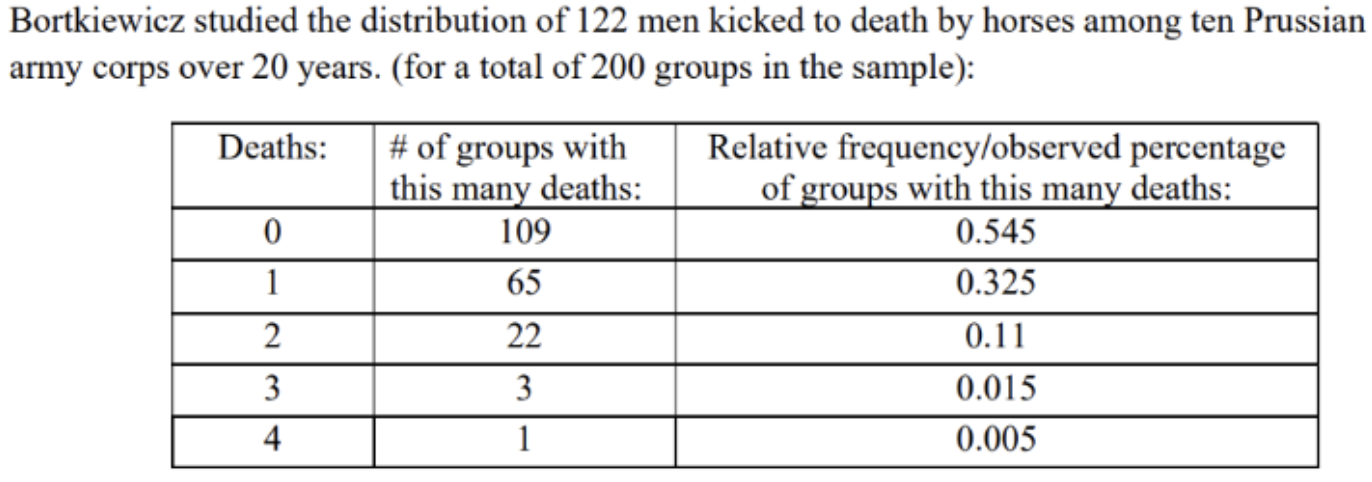

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting soon, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3996/2672551557.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(deaths, pmf_1, label = '$\mu$ = 0.5')
/tmp/ipykernel_3996/2672551557.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(deaths, pmf_2, label = '$\mu$ = 1.5')
/tmp/ipykernel_3996/2672551557.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(deaths, pmf_3, label = '$\mu$ = 2.5')
/tmp/ipykernel_3996/2672551557.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(deaths, pmf_4, label = '$\mu$ = 3.5')


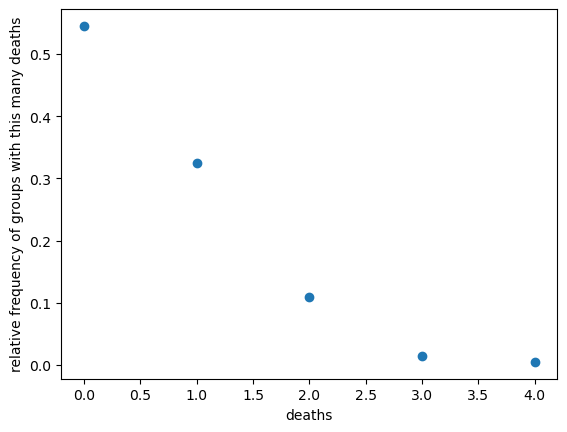

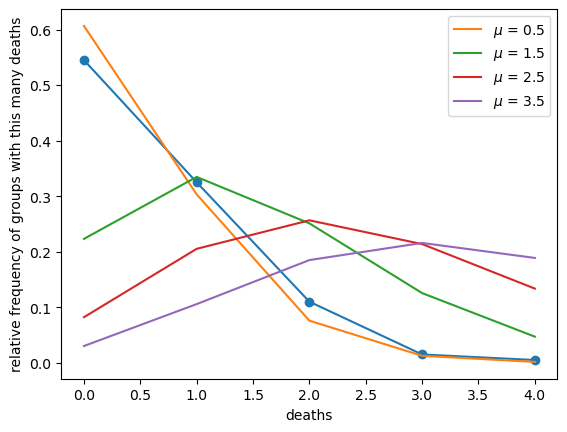

weighted mean: 0.6100000000000001


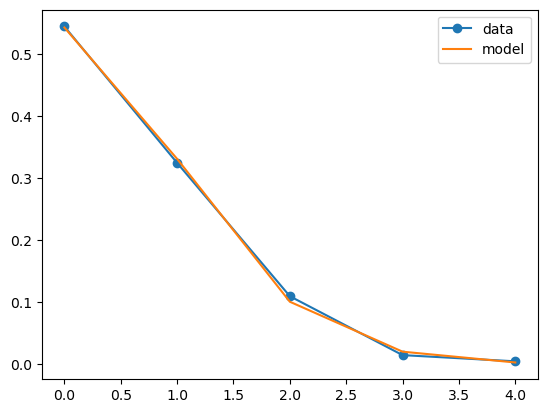

In [53]:
#part 1
deaths = [0,1,2,3,4]
freq = [0.545, 0.325, 0.11,0.015,0.005]
plt.scatter(deaths,freq)
plt.xlabel('deaths')
plt.ylabel('relative frequency of groups with this many deaths')
plt.show()

#part 2
from scipy.stats import poisson
pmf_1 = poisson.pmf(deaths, 0.5) #use pmf to make distribution at various means
pmf_2 = poisson.pmf(deaths, 1.5)
pmf_3 = poisson.pmf(deaths, 2.5)
pmf_4 = poisson.pmf(deaths, 3.5)
plt.plot(deaths,freq,marker='o')
plt.plot(deaths, pmf_1, label = '$\mu$ = 0.5')
plt.plot(deaths, pmf_2, label = '$\mu$ = 1.5')
plt.plot(deaths, pmf_3, label = '$\mu$ = 2.5')
plt.plot(deaths, pmf_4, label = '$\mu$ = 3.5')
plt.legend()
plt.xlabel('deaths')
plt.ylabel('relative frequency of groups with this many deaths')
plt.show()
plt.show()

#part 3
weighted_mean = np.average(deaths, weights=freq) #get average using weighted mean
print('weighted mean:', weighted_mean)

#part 4
pmf_modeled = poisson.pmf(deaths, weighted_mean) 
plt.plot(deaths,freq,marker='o', label='data')
plt.plot(deaths, pmf_modeled, label='model')
plt.legend()
plt.show()

SRT: Great. 45/50